In [1]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:13]
y = df.iloc[:,0]
df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X_std , y ,
     test_size = 0.3 , random_state=1 , stratify = y)

In [9]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1' , solver='liblinear' , C=1.0)
lr.fit(X_train , y_train)
print('Train Accuracy: ', lr.score(X_train , y_train))
print('Train Accuracy: ', lr.score(X_test , y_test))


Train Accuracy:  1.0
Train Accuracy:  0.9629629629629629


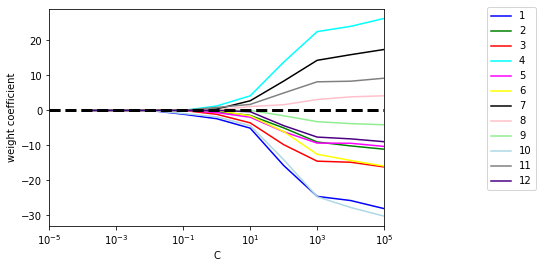

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen','lightblue',
          'gray','indigo','orange']
weights , params = [] , []
for c in np.arange(-4. , 6.):
    lr2=LogisticRegression(penalty = 'l1' , C=10.**c , solver='liblinear' , random_state=0)
    lr2.fit(X_train , y_train)
    weights.append(lr2.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column , color in zip (range(weights.shape[1]) , colors):
    plt.plot(params , weights[: , column], label=df.columns[column+1] ,
    color=color)
plt.axhline(0 , color='black' , linestyle='--' , linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left' )
ax.legend(loc='upper center',
    bbox_to_anchor=(1.38, 1.03) ,
    ncol=1, fancybox=True)
plt.show()